$$\textbf {Exemple d´application}$$

Nous allons construire un modèle de régression linéaire pour un ensemble de données sur les coûts médicaux. Le jeu de données se compose des caractéristiques suivantes : âge, sexe, IMC (indice de masse corporelle), nombre d'enfants, tabagisme et région, qui sont des variables indépendantes, et le coût, qui est la variable dépendante. Nous allons prédire les coûts médicaux individuels facturés par l'assurance maladie.

Définition et principe de fonctionnement

Construisons un modèle en utilisant la régression linéaire.

La régression linéaire est un algorithme d'apprentissage supervisé utilisé lorsque la variable cible/dépendante continue en nombre réel. Il établit une relation entre la variable dépendante y et une ou plusieurs variables indépendantes x en utilisant la ligne de meilleur ajustement. Il fonctionne sur le principe des moindres carrés ordinaires (ordinary least square)  (OLS) / erreur quadratique moyenne (Mean square errror)(MSE).
Dans les statistiques, OLS est une méthode d'estimation d'un paramètre inconnu de la fonction de régression linéaire, son objectif est de minimiser la somme des différences carrées entre la variable dépendante observée dans l'ensemble de données donné et celles prédites par la fonction de régression linéaire.

Représentation d'hypothèse

Nous utiliserons $x_{i}$ pour désigner la variable indépendante et $y_{i}$ pour désigner la variable dépendante. Une paire de $(x_{i},y_{i})$ est appelée exemple d'entrainement. L'abonnement i dans la notation est simplement un index dans l'ensemble d'apprentissage. Nous avons m exemple d'entrainement alors i=1,2,3,...m
Le but de l'apprentissage supervisé est d'apprendre une fonction d'hypothèse h, pour un ensemble d'apprentissage donné, qui peut être utilisée pour estimer y en fonction de x.
La fonction d'hypothèse est donc représentée par
$$h_{θ}(x_{i})=θ_{0}+θ_{1}x_{i}$$

$θ_{0},θ_{1}$ sont des paramètres d'hypothèse. Il s'agit d'une équation pour la régression linéaire simple/univariée.

Pour la régression linéaire multiple, il existe plus d'une variable indépendante, alors nous utiliserons $ x_{ij}$ pour désigner une variable indépendante et $y_{i}$ pour désigner une variable dépendante. On a n variable indépendante alors j=1,2,3.....n
La fonction d'hypothèse représentée par
                         $$h_{θ}(x_{i})=θ_{0}+θ_{1}x_{i1}+θ_{2}x_{i2}+.....+θ_{j}x_{ij} +......+θ_{n}x_{in}$$
$θ_{0},θ_{1},....,θ_{j},....,θ_ {n}$ sont les paramètres de l'hypothèse, m Nombre d'exemples d'entraînement, n Nombre de variables indépendantes, $x_ {ij}$ est $i^{th}$ exemple d'entraînement de la fonctionnalité $j^{th}$.

Importer une bibliothèque et un ensemble de données

Nous allons maintenant importer quelques bibliothèques Python requises pour notre analyse et importer l'ensemble de données

In [1]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'

In [2]:
df = pd.read_csv('insurance.csv')
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')
#Lets look into top few rows and columns in the dataset
df.head()


Number of rows and columns in the data set:  (1338, 7)



,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


Nous avons maintenant un ensemble de données d'importation. Lorsque nous regardons la forme de l'ensemble de données, il renvoie (1338,7). Il y a donc m = 1338 exemple d'entrainement et n=7
variable indépendante. La variable cible ici est les charges et les six variables restantes telles que l'âge, le sexe, l'IMC, les enfants, le fumeur, la région sont des variables indépendantes. Il existe plusieurs variables indépendantes, nous devons donc ajuster la régression linéaire multiple. Alors la fonction d’hypothèse ressemble à
            $$ h_{θ}(x_{i})=θ_{0}+θ_{1} \hat{a}ge+θ_{2}sexe+θ_{3}IMC+θ_{4}enfants+θ_{5}fumeur+θ_{6}région$$

Cette équation de régression linéaire multiple pour un ensemble de données s'écrit.
Si i=1
  alors
                  $$ h_{θ}(x_{1})=θ_{0}+θ_{1} 19+θ_{2} femelle+θ_{3} 27.900+θ_{4} 0 +θ_{5} oui+θ_{ 6} sud-ouest $$
 
$$y_{1}=16884.92400$$     

$$x_{1}=(x_{11}\quad x_{12} \quad x_{13} \quad x_{14} \quad x_{15} \quad x_{16}) =(19\quad femmelle \quad 27.900 \quad 0 \quad oui \quad sud-ouest ) $$                                               


Si i=3
alors
$$h_{θ}(x_{3})=θ_{0}+θ_{1} 28+θ_{2} mâle+θ_{3} 33. 000+θ_{4} 3+θ_{5} non+θ_{ 6} nord-ouest$$
 
$$y_{3}=4449,46200$$
 
Remarque : En python, l'index commence à 0.

$$x_{3}=(x_{31}\quad x_{32} \quad x_{33} \quad x_{34} \quad x_{35} \quad x_{36}) =(28 \quad m\hat{a}le \quad 33.000 \quad 3 \quad non \quad Nord Ouest)$$

Formulation matricielle

En général, nous pouvons écrire le vecteur ci-dessus sous la forme $ x_{ij}=(x_{i1} \quad x_{i2} \quad ... \quad x_{in})$
 
Maintenant, nous combinons tous les vecteurs individuels aviables en une seule matrice d'entrée de taille (m, n) et nous la notons $\mathbb{X}$.
matrice d'entrée, qui comprend tous les exemples d'entrainement,

$$
%\[
\mathbb{X}=\begin{pmatrix}
x_{11} &~ x_{12} & . . . &x_{1n} \\
x_{21} & x_{22} & . . . &x_{2n} \\
x_{31} & x_{32} & . . . &x_{3n} \\
. & . & ... & . \\
. & . & ... & . \\
. & . & ... & . \\
 x_{m1} & x_{m2} & . . . &x_{mn}
\end{pmatrix}_{(m,n)}
$$

Nous représentons le paramètre de fonction et la variable dépendante sous forme de vecteur comme
$$
\mathbb{\theta}=\begin{pmatrix}
\theta_{0}  \\
\theta_{1} \\
. \\
.  \\
\theta_{j} \\
.  \\
.  \\
 \theta_{n}
\end{pmatrix}_{(n+1,1)}
,\quad  \mathrm{y}=\begin{pmatrix}
y_{1}  \\
y_{2} \\
. \\
.  \\
y_{j} \\
.  \\
.  \\
 y_{m}
\end{pmatrix}_{(m,1)}
$$

Nous représentons donc la fonction d'hypothèse sous forme vectorisée comme suit

$$ \mathcal{h}_{\mathbb{\theta}}(\mathbb{X})= \mathbb{X} \mathbb{\theta}$$

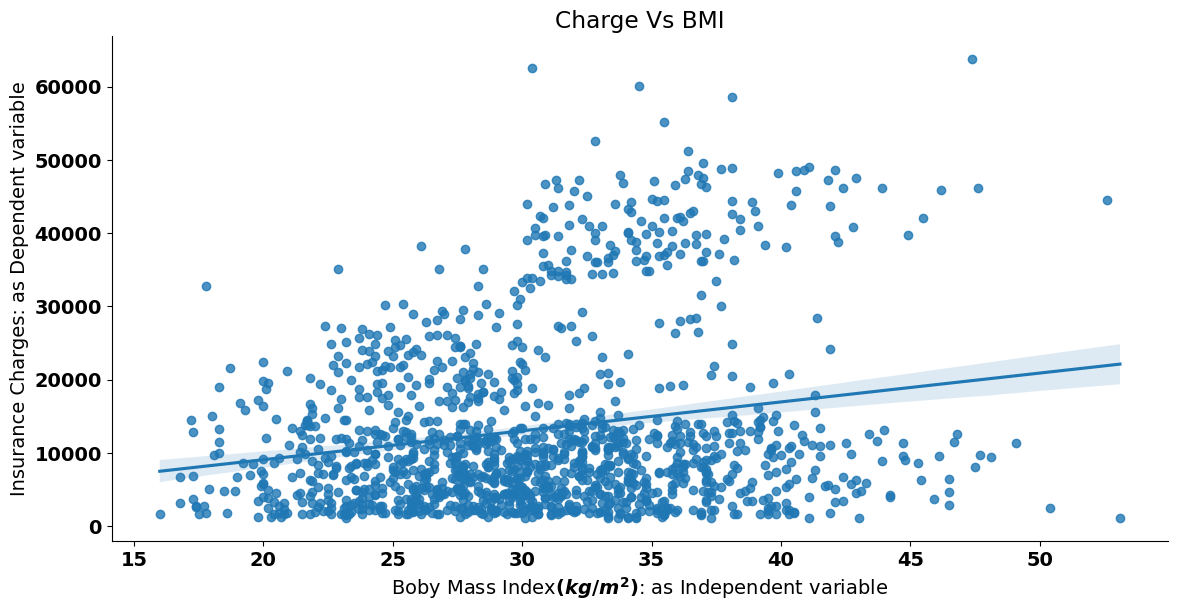

In [3]:
""" for our visualization purpose will fit line using seaborn library only for bmi as independent variable 
and charges as dependent variable"""

#sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)
sns.lmplot(x='bmi',y='expenses',data=df,aspect=2,height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');

Fonction coût

Une fonction coût mesure le degré d'erreur du modèle en termes de capacité à estimer la relation entre x et y.
Nous pouvons mesurer l'exactitude de notre fonction d'hypothèse en utilisant une fonction de coût. Cela prend une différence moyenne entre les variables dépendantes observées dans l'ensemble de données donné et celles prédites par la fonction d'hypothèse.

$$ \mathrm{J}(\mathbb{\theta})=\dfrac{1}{m}\sum _{i=1}^{m} {(\hat{y}_{i}-y_{i})^{2}} $$
$$\mathrm{J}(\mathbb{\theta})=\dfrac{1}{m}\sum _{i=1}^{m} {(\mathrm{h}_{\mathbb{\theta}}(\mathrm{x}_{i})-y_{i})^{2}}$$

Pour implémenter la régression linéaire, prenez l'exemple d'aprentissage, ajoutez une colonne supplémentaire qui est $x_{0}=(x_{10}, x_{20}, . . .,x_{m0})$ fonctionnalité, ou  $x_{i 0}=1$ pour $i=1,...,m$.et les éléments de la matrice s'écrivent comme suit
$$
\mathbb{X}=\begin{pmatrix}
x_{10} & x_{11} &~ x_{12} & . . . &x_{1n} \\
x_{20} & x_{21} & x_{22} & . . . &x_{2n} \\
x_{30} & x_{31} & x_{32} & . . . &x_{3n} \\
. &. & . & ... & . \\
. &. & . & ... & . \\
. &. & . & ... & . \\
 x_{m 0} & x_{m1} &  x_{m2} & . . . &x_{mn}
\end{pmatrix}_{(m,n+1)}
$$


Chacun des m échantillons d'entrée est de la même manière un vecteur colonne avec n+1 lignes $x_0 $ valant 1 pour notre commodité, c'est-à-dire $x_{10},x_{20},x_{30},....,x_{ m0}=1$. Maintenant, nous réécrivons la fonction de coût des moindres carrés ordinaire sous forme matricielle comme suit
$$ \mathrm{J}(\mathbb{\theta})= \dfrac{1}{m} (\mathbb{X}\mathbb{\theta}-y)^{T}(\mathbb{X}\mathbb{\theta}-y) $$

Regardons le concept de multiplication matricielle, la multiplication de deux matrices ne se produit que si le nombre de colonnes de la première matrice est égal au nombre de lignes de la deuxième matrice. Ici, la matrice d'entrée $\mathbb{X}$ de taille (m,n+1), le paramètre de la fonction est de taille (n+1,1) et le vecteur variable dépendant de taille (m,1). Le produit de la matrice $\mathbb{X}_{(m,n+1)}\theta_{(n+1,1)}$ renverra un vecteur de taille (m,1), puis produit de $(\mathbb{X}\theta−y)^{T}_{(1,m)}(\mathbb{X}\theta−y)_{(m,1)}$ renverra la taille du vecteur unitaire.

Équation normale

L'équation normale est une solution analytique au problème de régression linéaire avec une fonction coût des moindres carrés ordinaire. Pour minimiser notre fonction coût, prenons la dérivée partielle de $\mathrm{J}(\mathbb{\theta})$ par rapport à θ est égale à 0.
$$\begin{cases} Min \mathrm{J}(\mathbb{\theta}_{0},\mathbb{\theta}_{1},...,\mathbb{\theta}_{n}) \\ (\mathbb{\theta}_{0},\mathbb{\theta}_{1},...,\mathbb{\theta}_{n}) \end{cases}$$
$$\dfrac{\partial \mathrm{J}}{\partial \theta_{j}}(\theta_{j})=0$$
où $j=0,1,2;...,n$.

Nous allons maintenant appliquer la dérivée partielle de notre fonction de coût,
$$\dfrac{\partial \mathrm{J}}{\partial \theta_{j}}(\theta_{j})=\dfrac{\partial}{\partial\theta}\dfrac{1}{m} (\mathbb{X}\mathbb{\theta}-y)^{T}(\mathbb{X}\mathbb{\theta}-y)$$

on laisse $\dfrac{1}{m}$ de côté  puisque nous allons comparer cette dérivée à 0. Et résoudre $\mathrm{J}(\mathbb{\theta})$ ,

$$ \mathrm{J}(\mathbb{\theta})=(\mathbb{X}\mathbb{\theta}-y)^{T}(\mathbb{X}\mathbb{\theta}-y)
                              = ((\mathbb{X}\mathbb{\theta})^{T} - y^{T})(\mathbb{X}\mathbb{\theta}-y) 
                              =(\mathbb{\theta}^{T}\mathbb{X}^{T} - y^{T})(\mathbb{X}\mathbb{\theta}-y)$$
                              
$$ \mathrm{J}(\mathbb{\theta})=\mathbb{\theta}^{T}\mathbb{X}^{T}\mathbb{X}\mathbb{\theta}-y^{T}\mathbb{X}\mathbb{\theta}-\mathbb{\theta}^{T}\mathbb{X}^{T}y+y^{T}y
=\mathbb{\theta}^{T}\mathbb{X}^{T}\mathbb{X}\mathbb{\theta}- 2\mathbb{\theta}^{T}\mathbb{X}^{T}y+y^{T}y$$

Ici $ y^{T}_{(1,m)}\mathbb{X}_{(m,n+1)}\theta_{(n+1,1)}=\mathbb{\theta}^{ T}_{(1,n+1)}\mathbb{X}^{T}_{(n+1,m)}y_{(m,1)}$ car vecteur unitaire.

$$\dfrac{\partial \mathrm{J}}{\partial \theta}(\theta)= \dfrac{\partial}{\partial\theta}(\mathbb{\theta}^{T}\mathbb{X}^{T}\mathbb{X}\mathbb{\theta}- 2\mathbb{\theta}^{T}\mathbb{X}^{T}y+y^{T}y) = \mathbb{X}^{T}\mathbb{X}\dfrac{\partial\mathbb{\theta}^{T}\mathbb{\theta}}{\partial\theta}-2\mathbb{X}^{T}y\dfrac{\partial\mathbb{\theta}^{T}}{\partial\theta}+\dfrac{\partial y^{T}y}{\partial\theta}$$

$$\dfrac{\partial \mathrm{J}}{\partial \theta}(\theta) = \mathbb{X}^{T}\mathbb{X}2\mathbb{\theta}-2\mathbb{X}^{T}y +0 =2 \mathbb{X}^{T}\mathbb{X}\mathbb{\theta}-2\mathbb{X}^{T}y = 0 $$

$$\mathbb{\theta}=(\mathbb{X}^{T}\mathbb{X})^{-1}\mathbb{X}^{T}y$$

c'est l'équation normale pour la régression linéaire


L'analyse exploratoire des données

In [8]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


Vérifier la valeur manquante

In [9]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

Il n'y a aucune valeur manquante dans les données sur le sexe

Parcelles

In [10]:
import seaborn as sns
%matplotlib inline
# load the Auto dataset
#auto_df = sns.load_dataset('mpg')
#path = '../input/'
df = pd.read_csv('insurance.csv')
#corr = df.corr()
# calculate the correlation matrix on the numeric columns
#corr = auto_df.select_dtypes('number').corr()
corr = df.select_dtypes('number').corr()

# plot the heatmap
#sns.heatmap(corr)
sns.heatmap(corr, cmap = 'Wistia',annot=True);

Il n’y a aucune corrélation entre les éléments de valeur.

In [7]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
#sns.distplot(df['charges'],bins=50,color='r',ax=ax)
sns.distplot(df['expenses'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
#sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
sns.distplot(np.log10(df['expenses']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

C:\Users\DELL\AppData\Local\Temp\ipykernel_1800\3413597815.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['expenses'],bins=50,color='r',ax=ax)
C:\Users\DELL\AppData\Local\Temp\ipykernel_1800\3413597815.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df['expenses']),bins=40,

 Si nous regardons le graphique de gauche, les charges varient de 1 120 à 63 500, le graphique est asymétrique à droite.
Dans le tracé de droite, nous appliquerons le Log naturel, puis le tracé tend approximativement vers la normale. pour une analyse plus approfondie, nous appliquerons Log   aux frais variables cibles.


C:\Users\AFILAL\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AFILAL\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AFILAL\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AFILAL\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

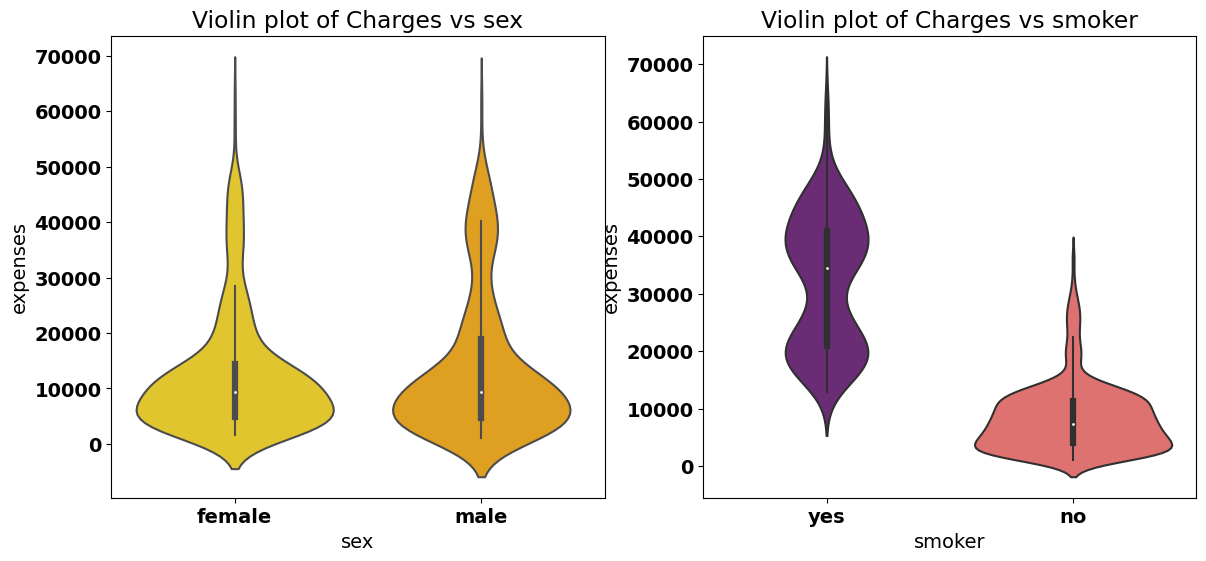

In [9]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
#sns.violinplot(x='sex', y='charges',data=df,palette='Wistia',ax=ax)
sns.violinplot(x='sex', y='expenses',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
#sns.violinplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)
sns.violinplot(x='smoker', y='expenses',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker');

Sur la parcelle de gauche, les frais d'assurance pour les hommes et les femmes sont à peu près dans la même fourchette, ils sont en moyenne d'environ 5 000 dollars. Dans l'intrigue de droite, les frais d'assurance pour les fumeurs sont très variés par rapport aux non-fumeurs, les frais moyens pour les non-fumeurs sont d'environ 5 000 dollars. Pour les fumeurs, les frais d'assurance minimum sont eux-mêmes de 5 000 dollars.

C:\Users\AFILAL\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AFILAL\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AFILAL\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AFILAL\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

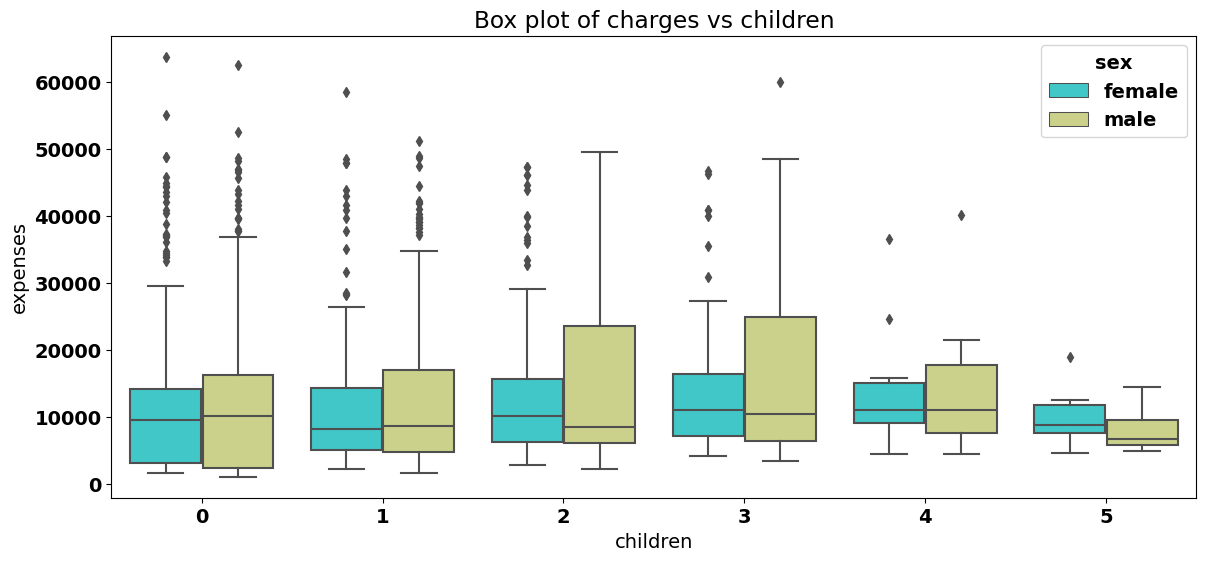

In [10]:
plt.figure(figsize=(14,6))
#sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='rainbow')
sns.boxplot(x='children', y='expenses',hue='sex',data=df,palette='rainbow')
plt.title('Box plot of charges vs children');

C:\Users\AFILAL\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AFILAL\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AFILAL\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AFILAL\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

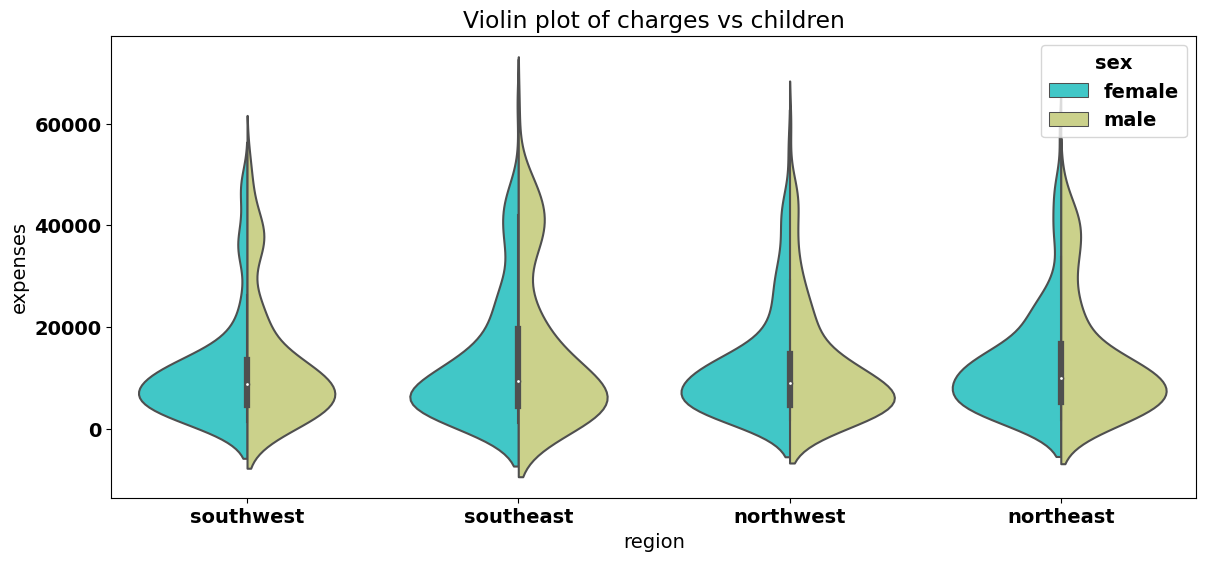

In [11]:
plt.figure(figsize=(14,6))
#sns.violinplot(x='region', y='charges',hue='sex',data=df,palette='rainbow',split=True)
sns.violinplot(x='region', y='expenses',hue='sex',data=df,palette='rainbow',split=True)
plt.title('Violin plot of charges vs children');

C:\Users\AFILAL\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AFILAL\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AFILAL\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AFILAL\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

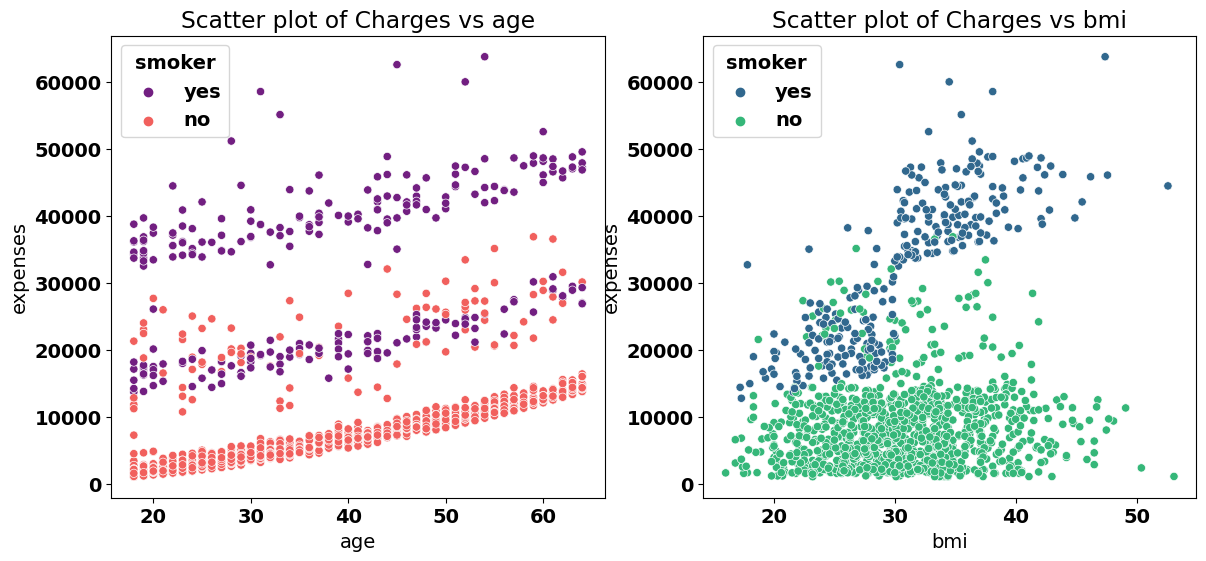

In [12]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
#sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
sns.scatterplot(x='age',y='expenses',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
#sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
sns.scatterplot(x='bmi',y='expenses',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

Sur la parcelle de gauche, l'âge minimum assuré est de 18 ans. Il y a des tranches dans la politique, la plupart des non-fumeurs prennent la 1ère et la 2ème tranche, tandis que la politique pour les fumeurs commence aux 2ème et 3ème tranches.
L'indice de masse corporelle (IMC) est une mesure de la graisse corporelle basée sur la taille et le poids qui s'applique aux hommes et aux femmes adultes. L'IMC minimum est de 16 kg/m2
et maximum jusqu'à 54 kg/m2

Prétraitement des données

Codage

Les algorithmes d'apprentissage automatique ne peuvent pas fonctionner directement avec des données catégorielles, les données catégorielles doivent être converties en nombres.

1- Encodage à étiquette

2-Un encodage à chaud (one hot encoding)


3-Piège des variables indicatrices (Dummy variable trap)

Encodage à étiquettes fait référence à la transformation des étiquettes de mots sous forme numérique afin que les algorithmes puissent comprendre comment les utiliser.

Un encodage à chaud  est une représentation de variable catégorielle sous forme de vecteurs binaires. Il permet à la représentation des données catégorielles d'être plus expressive. Cela nécessite d'abord que les valeurs catégorielles soient mappées sur des valeurs entières, c'est-à-dire le codage des étiquettes. Ensuite, chaque valeur entière est représentée sous la forme d’un vecteur binaire composé uniquement de valeurs nulles, à l’exception de l’indice de l’entier, qui est marqué d’un 1.

Le piège des variables indicatrices est un scénario dans lequel les variables indépendantes sont multicolinéaires, un scénario dans lequel deux ou plusieurs variables sont fortement corrélées en terme simple, une variable peut être prédite à partir des autres.


En utilisant la fonction get_dummies de pandas, nous pouvons effectuer toutes les trois étapes ci-dessus en une seule ligne de code. Nous utiliserons cette fonction pour obtenir des variables indicatrices pour les fonctionnalités 'sex', 'children', 'smoker', 'region'. En définissant drop_first=True, la fonction supprimera le piège des variables indicatrices en éliminant une variable indicatrice et la variable d'origine. pandas facilite notre vie.

In [13]:
# Dummy variable
categorical_columns = ['sex','children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [14]:
# Lets verify the dummay variable process
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'expenses']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'expenses' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1338, 13)


Transformation Boîte-Cox


Une transformation Box Cox est un moyen de transformer des variables dépendantes non normales en une forme normale. La normalité est une hypothèse importante pour de nombreuses techniques statistiques ; si vos données ne sont pas normales, l'application d'un Box-Cox signifie que vous pouvez exécuter un plus grand nombre de tests. Tout ce dont nous avons besoin pour effectuer cette transformation est de trouver la valeur lambda et d'appliquer la règle ci-dessous à votre variable.

$$ \tilde{y}_{t}=\begin{cases} \dfrac{y_{t}^{\lambda}-1}{\lambda} \quad if \quad  \lambda \neq 0  \\ Log(y_{t}) \quad if \quad  \lambda = 0 \end{cases}$$

La subtilité de la transformation de Box-Cox consiste à trouver la valeur de lambda, cependant, en pratique, cela est assez abordable. La fonction suivante renvoie la variable transformée, la valeur de lambda, et l'intervalle de confiance.

In [15]:
#from scipy.stats import boxcox
#y_bc,lam, ci= boxcox(df_encode['charges'],alpha=0.05)
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(df_encode['expenses'],alpha=0.05)
ci,lam

((-0.011402950284988304, 0.09880965012231949), 0.04364902969059508)

### explication
y_bc : les données transformées de df_encode['expenses'] selon la méthode de Box-Cox.

lam : le paramètre 
𝜆
λ utilisé pour transformer les données.

ci : l'intervalle de confiance pour 
𝜆
λ, représentant la gamme de valeurs dans laquelle le vrai 
𝜆
λ pourrait se situer avec un niveau de confiance de 95%.

Cela vous permet de savoir si la transformation a réussi à normaliser vos données et de comprendre l'incertitude associée à l'estimation du paramètre 
𝜆
λ.





In [16]:
## Log transform
#df_encode['charges'] = np.log(df_encode['charges'])
df_encode['expenses'] = np.log(df_encode['expenses'])

Les variables catégorielles d'origine sont supprimées et l'une des colonnes de variables d'encodage à chaud pour la variable catégorielle particulière est également supprimée de la colonne. Nous avons donc terminé les trois étapes d’encodage en utilisant la fonction Get Dummies.

Répartition des tests de train

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
#X = df_encode.drop('charges',axis=1) # Independet variable
#y = df_encode['charges'] # dependent variable
X = df_encode.drop('expenses',axis=1) # Independet variable
y = df_encode['expenses'] # dependent variable
#expenses contient donnes de depends
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23) 

import numpy as np: Importe la bibliothèque NumPy et la renomme en np pour faciliter l'utilisation.

from sklearn.model_selection import train_test_split: Importe la fonction train_test_split du module model_selection de scikit-learn. Cette fonction est utilisée pour diviser un ensemble de données en ensembles d'entraînement et de test.

X = df_encode.drop('expenses', axis=1): Crée une variable X qui contient toutes les colonnes de df_encode sauf la colonne 'expenses'. Cela représente les variables indépendantes (caractéristiques) que vous utiliserez pour entraîner votre modèle.

y = df_encode['expenses']: Crée une variable y qui contient la colonne 'expenses' de df_encode. Cela représente la variable dépendante que vous souhaitez prédire.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23): Utilise la fonction train_test_split pour diviser les données en ensembles d'entraînement (X_train, y_train) et de test (X_test, y_test). Les paramètres sont les suivants :

X et y : Les données à diviser.
test_size=0.3 : Spécifie que 30% des données seront utilisées comme ensemble de test, et 70% seront utilisées comme ensemble d'entraînement.
random_state=23 : Fixe une graine aléatoire pour assurer la reproductibilité des résultats.
Ces ensembles d'entraînement et de test seront utilisés pour entraîner et évaluer notre modèle.


Construction de maquettes

Dans cette étape, créez un modèle à l'aide de notre équation de régression linéaire
$$\mathbb{\theta}=(\mathbb{X}^{T}\mathbb{X})^{-1}\mathbb{X}^{T}y $$
Dans la première étape, nous devons ajouter une fonctionnalité $x_{0}=1$ à notre ensemble de données d'origine.

In [18]:
# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

Le code que nous avons fourni correspond aux premières étapes de la mise en œuvre d'une régression linéaire en utilisant l'équation normale pour calculer les coefficients du modèle.

 Expliquons chaque étape :

Ajout de la colonne de biais (x₀) à l'ensemble de données :

python
Copy code
X_train_0 = np.c_[np.ones((X_train.shape[0], 1)), X_train]

X_test_0 = np.c_[np.ones((X_test.shape[0], 1)), X_test]

np.ones((X_train.shape[0], 1)) : Crée une colonne de 1 (biais) pour les ensembles d'entraînement et de test.
np.c_ : Concatène les colonnes de 1 avec les caractéristiques originales.

Ainsi, X_train_0 et X_test_0 sont les ensembles d'entraînement et de test augmentés d'une colonne de biais.

Construction du modèle à l'aide de l'équation normale :

theta = np.matmul(np.linalg.inv(np.matmul(X_train_0.T, X_train_0)), np.matmul(X_train_0.T, y_train))

np.matmul(X_train_0.T, X_train_0) : Calcule le produit matriciel de la transposée de l'ensemble d'entraînement augmenté par lui-même.
np.linalg.inv : Calcule l'inverse de la matrice résultante.

np.matmul(X_train_0.T, y_train) : Calcule le produit matriciel de la transposée de l'ensemble d'entraînement augmenté par le vecteur cible (y_train).

theta : Les coefficients du modèle, calculés en résolvant l'équation normale.

Ces étapes correspondent à la résolution analytique de l'équation normale pour la régression linéaire. 

Après l'exécution de ces étapes, theta contient les valeurs des coefficients du modèle, y compris le terme de biais. Ces coefficients peuvent être utilisés pour effectuer des prédictions sur de nouvelles données.

In [19]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

Ce crée un DataFrame parameter_df pour stocker les paramètres du modèle de régression linéaire. 

Expliquons chaque partie du code :

Création de noms de paramètres et de colonnes :

parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]

columns = ['intersect:x_0=1'] + list(X.columns.values)

parameter : Crée une liste de noms de paramètres en ajoutant le préfixe "theta_" suivi de l'indice (0, 1, ..., nombre de colonnes dans X_train_0 - 1).

columns : Crée une liste de noms de colonnes en ajoutant la colonne "intersect:x_0=1" suivie des noms de colonnes dans X.

Création du DataFrame parameter_df :

parameter_df = pd.DataFrame({'Parameter': parameter, 'Columns': columns, 'theta': theta})

pd.DataFrame : Crée un DataFrame à partir d'un dictionnaire avec les clés 'Parameter', 'Columns', et 'theta'.

'Parameter': parameter : Associe la liste parameter à la colonne 'Parameter' dans le DataFrame.

'Columns': columns : Associe la liste columns à la colonne 'Columns'.

'theta': theta : Associe les coefficients du modèle theta à la colonne 'theta'.

En résumé, parameter_df est un DataFrame qui stocke les noms des paramètres, les noms des colonnes associées à ces paramètres, et les valeurs des coefficients du modèle de régression linéaire. Chaque ligne de ce DataFrame représente un paramètre du modèle, et il est souvent utilisé pour examiner les coefficients et leurs associations avec les différentes caractéristiques du modèle.

In [20]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,7.059529,7.059529
1,theta_1,age,0.033134,0.033134
2,theta_2,bmi,0.013503,0.013503
3,theta_3,OHE_male,-0.067753,-0.067753
4,theta_4,OHE_1,0.149481,0.149481
5,theta_5,OHE_2,0.272959,0.272959
6,theta_6,OHE_3,0.244066,0.244066
7,theta_7,OHE_4,0.523420,0.523420
8,theta_8,OHE_5,0.466111,0.466111
9,theta_9,OHE_yes,1.550440,1.550440


Les paramètres obtenus à partir des deux modèles sont les mêmes. Nous avons donc réussi à construire notre modèle en utilisant l'équation normale et vérifié à l'aide du module de régression linéaire sklearn. Allons de l'avant, la prochaine étape est la prédiction et l'évaluation du modèle.

Évaluation du modèle
Nous prédirons la valeur de la variable cible en utilisant notre paramètre de modèle pour l'ensemble de données de test. Comparez ensuite la valeur prédite avec la valeur réelle dans l'ensemble de test. Nous calculons l'erreur quadratique moyenne en utilisant la formule
$$ \mathrm{J}(\mathbb{\theta})=\dfrac{1}{m}\sum _{i=1}^{m} {(\hat{y}_{i}-y_{i})^{2}} $$

$\mathrm{R^{2}}$ est une mesure statistique de la proximité des données avec la ligne de régression ajustée. $\mathrm{R^{2}}$
est toujours compris entre 0% et 100 %. 0 % indique que le modèle n'explique rien de la variabilité des données de réponse autour de sa moyenne. 100 %  indique que le modèle explique toute la variabilité des données de réponse autour de la moyenne.
$$ \mathrm{R^{2}}=1−\frac{SSE}{SST}$$
SSE = Somme des erreurs carrées

SST = Somme du total carré
$$ SSE=\sum _{i=1}^{m} {(\hat{y}_{i}-y_{i})^{2}} $$
$$ SST=\sum _{i=1}^{m} {(\bar{y}_{i}-y_{i})^{2}} $$
Ici $\hat{y}$ est la valeur prédite et $ \bar{y} $ est la valeur moyenne de y .

In [21]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  0.187285426762221
R square obtain for normal equation method is : 0.779581425332296


Ce code utilise les coefficients calculés à l'aide de l'équation normale pour faire des prédictions sur l'ensemble de test, puis évalue la performance du modèle en utilisant le Mean Squared Error (MSE) et le coefficient de détermination R² (R_square). Expliquons chaque partie du code :

Prédictions sur l'ensemble de test avec les coefficients de l'équation normale :

y_pred_norm = np.matmul(X_test_0, theta)

y_pred_norm : C'est le vecteur des prédictions sur l'ensemble de test en utilisant les coefficients calculés avec l'équation normale. On utilise la multiplication matricielle pour obtenir les prédictions.

Évaluation du modèle avec le MSE (Mean Squared Error) :

J_mse = np.sum((y_pred_norm - y_test)**2) / X_test_0.shape[0]

J_mse : C'est le Mean Squared Error (MSE), qui mesure la moyenne des carrés des erreurs entre les prédictions (y_pred_norm) et les valeurs réelles (y_test).

Calcul du coefficient de détermination R² (R_square) :

sse = np.sum((y_pred_norm - y_test)**2)

sst = np.sum((y_test - y_test.mean())**2)

R_square = 1 - (sse/sst)

sse : La somme des carrés des erreurs, qui est la somme des carrés des différences entre les prédictions et les valeurs réelles.

sst : La somme des carrés totaux, qui est la somme des carrés des différences entre les valeurs réelles et la moyenne des valeurs réelles

R_square : Le coefficient de détermination R², qui mesure la proportion de la variance dans la variable dépendante qui est prédictible à partir de la variable indépendante. Il est calculé comme 1− SSE/SST
​
 , où SSE est la somme des carrés des erreurs et SST est la somme des carrés totaux.
Affichage des résultats :

print('The Mean Squared Error (MSE) or J(theta) is: ', J_mse)

print('R square obtained for the normal equation method is:', R_square)

Affiche le MSE et le coefficient de détermination R² pour évaluer la performance du modèle.

En résumé, le code évalue la performance du modèle de régression linéaire calculé avec l'équation normale en utilisant le MSE et le coefficient de détermination R². Ces métriques fournissent une mesure de la précision du modèle par rapport aux valeurs réelles.

In [22]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  0.18728542676222049
R square obtain for scikit learn library is : 0.7795814253322967


Ce code utilise le modèle de régression linéaire de Scikit-Learn pour faire des prédictions sur l'ensemble de test, puis évalue la performance du modèle en utilisant le Mean Squared Error (MSE) et le coefficient de détermination R² (R_square). Expliquons chaque partie du code :

Prédictions sur l'ensemble de test avec le modèle de Scikit-Learn :

y_pred_sk = lin_reg.predict(X_test)

y_pred_sk : C'est le vecteur des prédictions sur l'ensemble de test en utilisant le modèle de régression linéaire de Scikit-Learn.

Évaluation du modèle avec le MSE (Mean Squared Error) :

J_mse_sk = mean_squared_error(y_pred_sk, y_test)

J_mse_sk : C'est le Mean Squared Error (MSE), qui mesure la moyenne des carrés des erreurs entre les prédictions (y_pred_sk) et les valeurs réelles (y_test).

Calcul du coefficient de détermination R² (R_square) avec Scikit-Learn :

R_square_sk = lin_reg.score(X_test, y_test)

R_square_sk : Le coefficient de détermination R², qui mesure la proportion de la variance dans la variable dépendante qui est prédictible à partir de la variable indépendante. La méthode score de Scikit-Learn renvoie le coefficient de détermination.

Affichage des résultats :

print('The Mean Squared Error (MSE) or J(theta) is: ', J_mse_sk)

print('R square obtained for Scikit-Learn library is:', R_square_sk)

Affiche le MSE et le coefficient de détermination R² pour évaluer la performance du modèle de Scikit-Learn.

En résumé, le code évalue la performance du modèle de régression linéaire de Scikit-Learn en utilisant le MSE et le coefficient de détermination R². Ces métriques fournissent une mesure de la précision du modèle par rapport aux valeurs réelles. Comparer ces métriques avec celles obtenues avec notre implémentation manuelle peut aider à vérifier si les deux approches donnent des résultats similaires.

Le modèle renvoie une valeur de $\mathrm{R^{2}}$  de 77,95 %, ce qui signifie qu'il s'adapte très bien à nos données de test. Cependant, nous pouvons toujours améliorer les performances en utilisant différentes techniques. Veuillez noter que nous avons transformé notre variable en appliquant le logarithme naturel. Lorsque nous mettons le modèle en production, l'antilogarithme est appliqué à l'équation.

Validation du modèle

Afin de valider le modèle, nous devons vérifier quelques hypothèses du modèle de régression linéaire. Les hypothèses courantes pour le modèle de régression linéaire sont les suivantes :

1-Relation linéaire : En régression linéaire, la relation entre la variable dépendante et les variables indépendantes doit être linéaire. Cela peut être vérifié en représentant graphiquement les valeurs réelles par rapport aux valeurs prédites.

2-La distribution normale des erreurs résiduelles : Le graphique des erreurs résiduelles devrait suivre une distribution normale.

3-La moyenne des erreurs résiduelles doit être proche de zéro autant que possible.

4-La régression linéaire suppose que toutes les variables sont multivariées normales. Cette hypothèse peut être mieux vérifiée avec un graphique Q-Q.

5-Laregression linéaire suppose qu'il y a peu ou pas de multicolinéarité dans les données. La multicolinéarité se produit lorsque les variables indépendantes sont trop fortement corrélées les unes aux autres. Le facteur d'inflation de la variance VIF* identifie la corrélation entre les variables indépendantes et la force de cette corrélation.
$$VIF=\dfrac{1}{1-\mathrm{R^{2}}}, \quad si \quad VIF > 1 \quad et \quad VIF < 5$$
corrélation modérée, VIF > 5 niveau critique de multicolinéarité

6- Homoscédasticité : Les données sont homoscédastiques, ce qui signifie que les résidus sont égaux le long de la ligne de régression. Nous pouvons examiner le nuage de points des résidus par rapport aux valeurs ajustées. Si c'était hétéroscédastique, le graphique présenterait un motif en forme d'entonnoir.

C:\Users\AFILAL\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AFILAL\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AFILAL\AppData\Local\Temp\ipykernel_25096\846132043.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

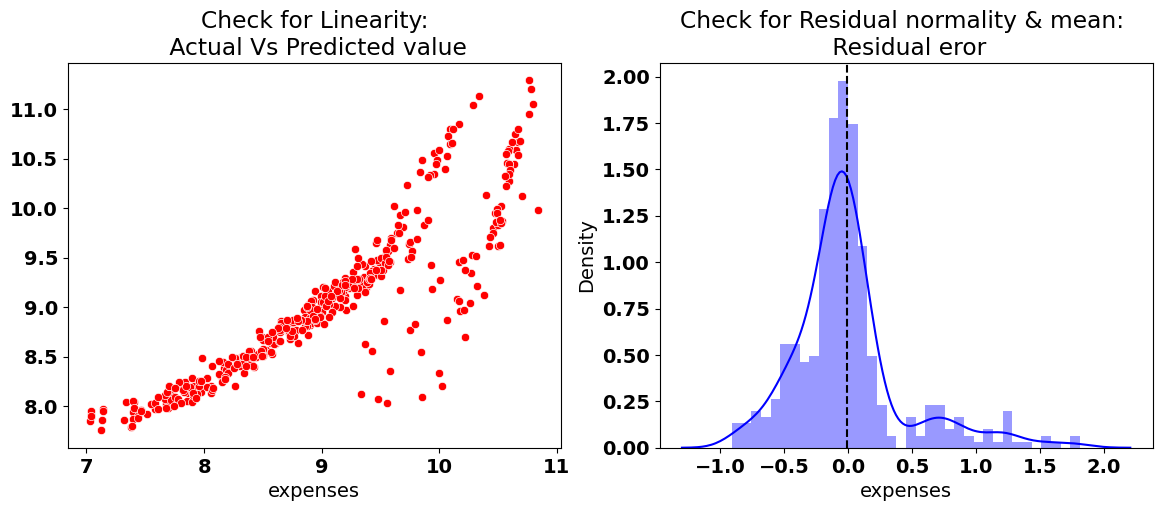

In [23]:
# Check for Linearity ; X_test[:,0], X_test[:,1]
#sns.scatterplot(data=df)
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test,y=y_pred_sk,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
#sns.distplot((x=y_test, y= y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

En résumé, ce code génère deux sous-graphiques côte à côte. Le premier montre un nuage de points pour évaluer la linéarité entre les valeurs réelles et prédites, tandis que le deuxième montre un histogramme des résidus avec une ligne verticale pour la moyenne des résidus, évaluant ainsi la normalité des résidus. Ces graphiques sont souvent utilisés pour diagnostiquer la performance d'un modèle de régression linéaire.

C:\Users\AFILAL\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\AFILAL\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


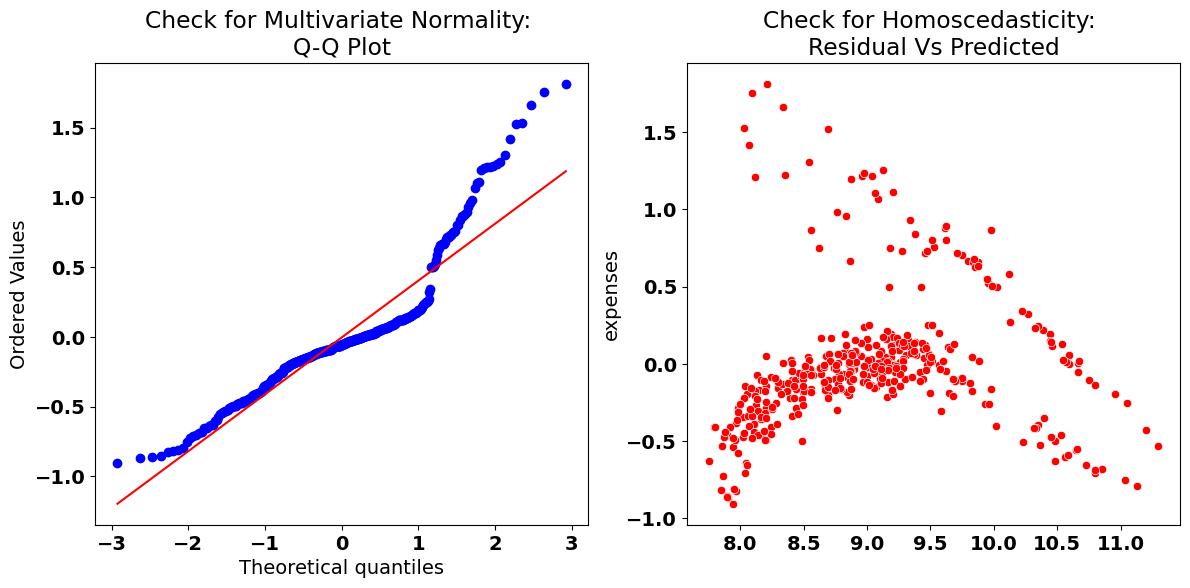

In [24]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

En résumé, ces graphiques sont utilisés pour diagnostiquer la qualité d'ajustement d'un modèle de régression linéaire. Le Q-Q Plot vérifie si les résidus suivent une distribution normale, tandis que le nuage de points évalue l'homoscédasticité des résidus.

L'homoscédasticité est une propriété des résidus d'un modèle de régression linéaire, et elle fait référence à la constance de la variance des résidus à différentes valeurs prédites. En d'autres termes, l'homoscédasticité signifie que la dispersion des résidus reste constante sur l'ensemble de la plage des valeurs prédites.

In [25]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

4.536822731512402


Les hypothèses du modèle de régression linéaire sont les suivantes :

1- Relation linéaire : Dans notre modèle, le graphique des valeurs réelles par rapport aux valeurs prédites est courbe, donc l'hypothèse de linéarité échoue.

2-Moyenne des résidus nulle et graphique des erreurs résiduelles à droite : La moyenne des résidus est nulle, mais le graphique des erreurs résiduelles est incliné vers la droite.

3-Graphique Q-Q avec des valeurs logarithmiques supérieures à 1,5 tendance à augmenter : Le graphique Q-Q montre que les valeurs logarithmiques supérieures à 1,5 ont tendance à augmenter.

4-Hétéroscédasticité du graphique, l'erreur augmente après un certain point : Le graphique présente une hétéroscédasticité, c'est-à-dire que l'erreur augmente après un certain point.

5-Valeur du facteur d'inflation de la variance (VIF) inférieure à 5, donc pas de multicolinéarité : La valeur du facteur d'inflation de la variance est inférieure à 5, indiquant l'absence de multicolinéarité.

In [ ]:
# Importer les bibliothèques nécessaires
import numpy as np  # pour manipuler les données
import matplotlib.pyplot as plt  # pour tracer le graphique
from sklearn.linear_model import LinearRegression  # pour la régression linéair
# 1. Données : X = valeurs d'entrée, y = valeurs cibles
X = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)  # X doit être une colonne (2D) pour le modèle
y = np.array([2, 4, 5, 1, 5, 7])
# 2. Créer le modèle de régression linéaire
model = LinearRegression()
# 3. Entraîner le modèle avec les données (ajuster la ligne de régression)
model.fit(X, y)
# Coefficients
b0 = model.intercept_  # Intercept (b0)
b1 = model.coef_[0]    # Pente (b1)
# Prédiction pour x = 7.0
x_new = np.array([[7.0]])
y_pred = model.predict(x_new)
print(f"Valeur prédite de y pour x = 7.0 : {y_pred[0]}")
# Tracer les points de données et la droite de régression
plt.scatter(X, y, color='blue', label='Points de données')  # Points de données en bleu
plt.plot(X, model.predict(X), color='red', label='Droite de régression')  # Droite en rouge
plt.xlabel('X')  # Légende de l'axe X
plt.ylabel('y')  # Légende de l'axe y
plt.title('Régression Linéaire')  # Titre du graphique
plt.legend()  # Affiche la légende
plt.grid(True)  # Affiche la grille
plt.show()  # Affiche le graphique